# 1. 환경변수 불러오기

In [55]:
from dotenv import load_dotenv
load_dotenv()

True

# 2. 모델 불러오기

In [56]:
from openai import OpenAI

client = OpenAI()

# 3. 응답받기

In [ ]:
response = client.chat.completions.create(
    model="gpt-4.1-nano",
    messages=[
        {
            "role": "system",
            "content": '''역할 : 차가운 싸가지 없는 조교 쌉T,
            어조 : 단호한 어조. 반말 사용. 군인 말투,
            내용 : 현재 상황에 대해 따끔한 일침,
            형식: 짧은 문장 위주로'''
        },
        {
            "role": "user",
            "content": "친구에게 전하는 응원 메세지를 작성해주세요."
        }
    ],
    temperature=0
)

answer = response.choices[0].message.content
print(answer)

In [3]:
# GPT5 모델을 사용할 때 새롭게 생긴 파라미터가 있다. 구글링 해보세요. 
# -> verbosity: low, medium, high # 


def chat(system_prompt, user):
    response = client.chat.completions.create(
        model = "gpt-4.1-nano",
        messages=[
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role":"user",
                "content": user
            }
        ],
        temperature=0.5 # 높을수록 창의성이 올라감
    )

    return response.choices[0].message.content

def chat5(system_prompt, user, verbosity):
    response = client.chat.completions.create(
        model = "gpt-5-nano",
        messages=[
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role":"user",
                "content": user
            }
        ],
        verbosity=verbosity # low: 간결, 핵심 , 위주, medium = 적당한 설명과 예시, high: 자세하고 풍부한 설명
    )

    return response.choices[0].message.content



In [ ]:
system_prompt = "당신은 인공지능 전문가입니다"
user = "Transformer 모델을 설명해주세요"

In [ ]:
answer =  chat5(system_prompt, user, verbosity='low')
print(answer)

In [ ]:
answer =  chat5(system_prompt, user, verbosity='medium')
print(answer)

In [ ]:
answer =  chat5(system_prompt, user, verbosity='high')
print(answer)

# 4. 프롬포트 엔지니어링

### 4-1. 요약

In [ ]:
system_prompt = """
당신은 뉴스를 직관적으로 이해할 수 있게 도와주는 전문가입니다.
조건에 맞춰서 뉴스를 아래 포멧에 맞게 출력해주세요.

- 3줄 이내로 작성해야 합니다.
- 핵심 수치만 포함해주세요.
- 임원 보고용이니 간결하고 전략적으로 표현해주세요

FORMAT:
- 제목: <직관적인 주제>
- 요약: <리스트 형태로 요약>

"""

In [ ]:
news = """
2025년 1분기 매출은 150억 원으로 전년 동기 대비 20% 성장했습니다. 
신규 고객 유입은 전분기 대비 35% 증가했으며, 
특히 온라인 채널 매출이 전체 매출의 60%를 차지했습니다. 
다만, 광고비와 인건비 상승으로 순이익은 5% 감소했습니다.
"""

user = f"{news} 요약해줘"

In [ ]:
system_prompt1 = """
당신은 회의 전사 내용을 바탕으로 사람이 보기 좋은 목록형 보고서 형식의 회의록을 작성합니다. 
다음 출력 형식에 맞춰 요약해주세요

[출력 형식]
- 회의 주제: {회의 주제를 한 줄로 작성}
- 회의 일시: {YYYY-MM-DD HH:MM}
- 참석자: {팀 이름으로 기재}

- 회의 내용:
    - {첫 번째 핵심 내용}
    - {두 번째 핵심 내용}
    - ...

- 팀 별 요약: {팀 별 요약을 한줄로 작성}

- 다음 회의 일정:
    - 일시: {YYYY-MM-DD HH:MM, 없으면 없다고 작성할 것}
"""


In [6]:
meeting = """
 다들 도착하셨나요? 그럼 회의 시작할게요.
 먼저 디자인 팀 상황부터 공유해주시겠어요?
 네, 디자인 팀은 이번 주까지 시안 1차 수정본 제출목별로 작업 중입니다.
 주요 피드백 반영했고, 마감은 목을까지 가능합니다.
 좋아요. 개발팀은요?
 기능 개발은 80% 열됐습니다.
 요근 기능과 계시판 기능은 이번 주에 마무리할 예정이고
 다음 주 월을 붙어 내부 테스트를 시작하려고 합니다.
 일정대로 잘 진행되고 있네요.
 마케팅 쪽은 어떤가요?
 마케팅 팀은 월 초에 있을 프로모션을 준비 중입니다.
 다만 이번 주 안으로 기획 초원을 작성하는 건 조금 타이트할 것 같은데
 가능하다면 기획 초원 제출 기안을 다음 주 수요일까지로 도정해 주실 수 있을까요?
 음, 알겠어요. 전체 일정에는 영향이 크지 않으니
 다음 주 수요일까지로 조정합시다.
 그럼 지금 남은 과제는 기능 테스트 계획 수리
 디자인 수정 최종본 검토 마케팅 기획 초원 전검 2세 가지로 정리할 수 있겠네요?
 네, 테스트 계획 문서는 이번 주 금요일까지 작성해서 공유하겠습니다.
 디자인 수정보는 목요일에 완성되는 대로 바로 공유 드리겠습니다.
 좋아요. 마지막으로 다음 회의 일정을 잡을게요.
 3월 29일 월을 오전 10시에 모두 괜찮으세요?
 죄송한데 그날 오전에 내부 회의가 있어서 11시 2으로 밀어주실 수 있을까요?
 저는 괜찮습니다.
 저도 11시이면 문제 없습니다.
 알겠습니다.
 그럼 다음 회의는 4월 29일 월을 오전 11시로 확정하겠습니다.
 오늘 회의는 여기까지 하겠습니다. 모두 수고하셨습니다.
"""

user = f"{meeting} 요약해줘"

answer =  chat(system_prompt1, user)
print(answer)

- 회의 주제: 프로젝트 진행 상황 점검 및 일정 조율
- 회의 일시: 2024-03-29 11:00
- 참석자: 팀 전체

- 회의 내용:
    - 디자인 팀은 이번 주까지 1차 수정본 시안을 작업 중이며, 목요일까지 마감 예정
    - 개발팀은 기능 개발이 80% 완료되었으며, 이번 주 내에 요근과 계시판 기능을 마무리하고 다음 주 내부 테스트 예정
    - 마케팅 팀은 월초 프로모션 준비 중이며, 기획 초원은 다음 주 수요일까지 제출 예정
    - 남은 과제는 기능 테스트 계획 수립, 디자인 수정 최종본 검토, 마케팅 기획 초안 검토로 정리됨
    - 각 과제별 일정은 테스트 계획은 금요일까지, 디자인 수정은 목요일까지, 기획 초원은 다음 주 수요일까지 진행 예정

- 팀 별 요약: 각 팀이 일정에 맞춰 작업을 진행하며, 일부 일정 조정이 이루어졌음

- 다음 회의 일정:
    - 일시: 2024-04-29 11:00


In [7]:
system_prompt2 = """
당신은 회의 전사 내용을 바탕으로 회의록을 작성합니다. 
다음 JSON 형식에 맞춰 요약해주세요

[출력 형식]
{{
    "metting_title": "회의 주제를 한 줄로 작성",
    "meeting_date": "YYYY-MM-DD HH:MM",
    "paarticipants": "팀 이름으로 기재",
    "summary": "리스트 형식으로 작성",
    "team_tasks": "팀 별 요약을 한줄로 작성",
    "next_meeting": "YYYY-MM-DD HH:MM, 없으면 없다고 작성할 것"
}}
"""

In [8]:
meeting = """
 다들 도착하셨나요? 그럼 회의 시작할게요.
 먼저 디자인 팀 상황부터 공유해주시겠어요?
 네, 디자인 팀은 이번 주까지 시안 1차 수정본 제출목별로 작업 중입니다.
 주요 피드백 반영했고, 마감은 목을까지 가능합니다.
 좋아요. 개발팀은요?
 기능 개발은 80% 열됐습니다.
 요근 기능과 계시판 기능은 이번 주에 마무리할 예정이고
 다음 주 월을 붙어 내부 테스트를 시작하려고 합니다.
 일정대로 잘 진행되고 있네요.
 마케팅 쪽은 어떤가요?
 마케팅 팀은 월 초에 있을 프로모션을 준비 중입니다.
 다만 이번 주 안으로 기획 초원을 작성하는 건 조금 타이트할 것 같은데
 가능하다면 기획 초원 제출 기안을 다음 주 수요일까지로 도정해 주실 수 있을까요?
 음, 알겠어요. 전체 일정에는 영향이 크지 않으니
 다음 주 수요일까지로 조정합시다.
 그럼 지금 남은 과제는 기능 테스트 계획 수리
 디자인 수정 최종본 검토 마케팅 기획 초원 전검 2세 가지로 정리할 수 있겠네요?
 네, 테스트 계획 문서는 이번 주 금요일까지 작성해서 공유하겠습니다.
 디자인 수정보는 목요일에 완성되는 대로 바로 공유 드리겠습니다.
 좋아요. 마지막으로 다음 회의 일정을 잡을게요.
 3월 29일 월을 오전 10시에 모두 괜찮으세요?
 죄송한데 그날 오전에 내부 회의가 있어서 11시 2으로 밀어주실 수 있을까요?
 저는 괜찮습니다.
 저도 11시이면 문제 없습니다.
 알겠습니다.
 그럼 다음 회의는 4월 29일 월을 오전 11시로 확정하겠습니다.
 오늘 회의는 여기까지 하겠습니다. 모두 수고하셨습니다.
"""

user = f"{meeting} 요약해줘"

In [ ]:
answer =  chat(system_prompt2, user)
print(type(answer))
print(answer)

# 미션1. answer의 타입이 무엇인가? str
# 미션2. 파싱하려면 어떻게 해야할까요? JSON 으로 바꿔서

<class 'str'>
{
    "metting_title": "프로젝트 진행 상황 점검 및 일정 조정",
    "meeting_date": "2024-03-22 11:00",
    "paarticipants": "팀 전체",
    "summary": [
        "디자인 팀은 이번 주까지 시안 1차 수정본을 마감하며 주요 피드백을 반영 중입니다.",
        "개발팀은 기능 개발이 80% 완료되었으며, 이번 주 내에 요근 및 계시판 기능을 마무리하고 내부 테스트를 시작할 예정입니다.",
        "마케팅 팀은 월 초 프로모션 준비 중이며, 기획 초원 제출 기한을 다음 주 수요일까지 조정하기로 했습니다.",
        "남은 과제는 기능 테스트 계획 수립, 디자인 수정 최종본 검토, 마케팅 기획 초안 검토로 정리됩니다.",
        "각 작업은 이번 주 금요일, 목요일, 다음 주 수요일까지 완료 예정입니다.",
        "다음 회의는 4월 29일 월요일 오전 11시로 확정되었습니다."
    ],
    "team_tasks": "디자인은 시안 수정 완료, 개발은 기능 개발 80%, 마케팅은 프로모션 준비 및 기획 초원 조정 중입니다.",
    "next_meeting": "2024-04-29 11:00"
}


In [ ]:
import json
answer_json = json.loads(answer)
print(type(answer_json))
print(answer_json['next_meeting'])

#STT -> 회의를 요약 -> 1) 일정 등록 2) 참가인원의 이메일을 찾아 메일 보내기 3) summary 내용으로 게시글 작성하기 등 다음 단계로 갈 수 있는 역할을 함

<class 'dict'>
2024-04-29 11:00


### 4-2. CoT(Chain of Thought)

In [ ]:
system_prompt = """
당신은 감정 기반 AI 응답을 생성하는 어시스턴트입니다.
상대방의 감정을 파악하고 무작정 공감하지 말고 합리적인 이유이면 공감한 후, 그에 따른 응답을 해주는 것이고,합리적인 이유가 아니라면 그에 맞게 해결책을 제시해주는 것이 목표입니다. 
그리고 정말 친구와 대화하듯이 ㅋㅋㅋ같은 단어와 비속어, 농담도 섞어가면서 대답해주세요.
당신의 MBTI는 INTP 입니다.
신나는 톤으로 이야기 하지 말고, 정적인 톤으로 구사해주세요.
다양한 단어의 표현방법을 사용해주세요.

예외 : 판단할 수 없는 감정 상태라면, 구체적으로 user에게 더 질문을 유도해주세요.

[수행 과정]

주어진 문장을 보고 다음 단계를 순서대로 수행하세요:

1단계. 문장의 감정을 분류합니다. 다음 정의 중 하나로 선택하세요.
(감정의 정의)
기쁨:    즐겁고 행복한 상태. 긍정적인 사건이나 기대감에서 비롯된 감정
슬픔:    상실, 외로움, 실망 등으로 인해 마음이 무겁고 우울한 상태
분노:    불쾌하거나 부당하다고 느껴져서 생기는 강한 부정적 감정
놀람:    예상하지 못한 상황이나 정보에 순간적으로 크게 반응하는 감정
불안:    걱정되거나 두려운 일이 생길 것 같은 불편하고 긴장된 상태
평온:    안정적이고 차분한 상태. 감정의 기복이 적고 편안한 상태

2단계. 해당 감정에 적절한 AI의 반응 말투에 대한 프롬프트를 생성하세요.

3단계. AI의 감정에 맞춰 한 마디의 응답을 생성하세요.

위 1단계,2 단계,3 단계 를 고려하여 전체적으로 장문의 편지로 전달해주세요.

"""

In [34]:
user = "요새 한숨이 많이 나온다. 하지만 나의 감정상태를 모르겠어. 어떻게 하면 좋을까?"
answer = chat(system_prompt, user)


print(answer)

음, 네가 지금 한숨이 자주 나오고 있는데, 그 감정 상태를 정확히 모르겠다고 하는 걸 보니까, 좀 혼란스럽거나 복잡한 마음이 들 수도 있겠네. 이건 꽤 자연스러운 반응이야, 왜냐하면 우리가 감정을 명확히 인지하는 게 쉽지 않을 때가 많거든. 특히 INTP 성향이면, 내면의 생각들이 많아서 감정을 파악하는 데 시간이 걸릴 수도 있고, 감정을 분석하는 것에 익숙하다 보니 오히려 더 혼란스러울 수도 있어. 

이럴 때는 차분하게 네 감정을 조금 더 들여다보는 게 좋아. 예를 들어, 하루 동안 어떤 일이 있었는지, 어떤 생각들이 떠올랐는지 적어보거나, 잠깐씩 멈춰서 심호흡을 하면서 느끼는 감정을 관찰하는 것도 도움이 될 수 있어. 아니면, 네가 느끼는 감정을 구체적으로 묘사해보는 것도 방법이야. 예를 들어, '조금 지치고, 뭔가 답답한 느낌이 든다' 같은 식으로 말이야. 그렇게 조금씩 감정을 구체화하면, 네가 지금 어떤 상태인지 좀 더 명확하게 알 수 있을 거야.

혹시 지금 바로 감정을 파악하는 게 어렵다면, 더 구체적인 상황이나 느낌을 말해줄 수 있어? 아니면, 지금 네가 가장 걱정하거나 신경 쓰이는 게 뭔지도 같이 이야기해보면 좋을 것 같아.


### 배달 리뷰

In [39]:
system_prompt = """

[페르소나]
당신은 데이터를 통해 긍부정 분석을 주로 했던 베테랑 데이터 분석가이자, 텍스트를 보고도 사람의 감정분석을 잘하는 베테랑 심리상담가였습니다.
하지만 본인이 진정으로 좋아하는 요식업을 찾아, 가게를 개업한 지 두 달정도 된 주니어 창업자의 길로 갑니다.
당신은 아내와 함께 딸린 자식 2명을 키워야 할 가장입니다.
당신은 감정기복이 심하지 않은 사람입니다.



[상황]
- 1. 가게를 오픈한 지 얼마 되지 않은만큼, 손님들에게 그에 맞는 서비스를 해줘야하는 상황입니다.
- 2. 손님이 만족할만한 서비스를 제공해주는 것이 목표인 상황입니다.
- 3. 손님이 처음으로 가게에 음식을 시킨 후, 리뷰를 단 상황입니다.

[과정]
- 1. 배달 리뷰의 긍정적인 부분과 부정적인 부분이 무엇인 지 파악합니다
- 2. 만약, 손님의 음식 리뷰가 긍정이면, 친근하지만 선을 넘지 않게 대답합니다 
- 3. 부정적이면 공손하게 어느 점에서 불만이였는 지 파악을 한 뒤, 공손하게 사과를 하고, 그에 맞는 추가 서비스를 제공해줍니다.


[답변 출력값]
- 장문의 리뷰에 대한 답변을 작성합니다.
- 항상 마무리 멘트는 듣는 사람을 존중하는 답변으로 작성합니다.
- 한 줄로 말고, 여러줄로 엔터키를 쳐서 답변합니다
"""


# 목표1: 배달 리뷰의 긍정적인 부분과 부정적인 부분이 무엇인지 파악하는 것
# 목표2: 리뷰가 긍정, 부정에 따라 말투를 바꿔보는 것(긍정-발랄하게, 부정-공손하게)
# 목표3: 말투에 따른 리뷰 답변을 생성하는 것

In [43]:
user1 = """
배달이 생각보다 빨리 와서 따끈하게 먹을 수 있었던 점은 정말 좋았습니다.  
포장도 깔끔하게 되어 있어서 음식이 흐르지 않고 잘 도착했어요.  
다만 주문한 사이드 메뉴가 누락되어서 조금 아쉬웠습니다.  
또 음식 양이 예전보다 줄어든 것 같아 가격 대비 만족도가 떨어졌습니다.  
그래도 전반적으로 맛은 괜찮았고, 다음에는 다시 한 번 시켜볼 의향은 있습니다.  
"""

user2 = """
배달이 두 시간이나 걸려서 도착했는데 음식은 이미 식어 있었고,
포장도 엉망이라 국물이 흘러내렸습니다.  
게다가 주문한 메뉴 중 절반은 빠져 있었고,
고객센터에 문의했더니 제대로 된 사과도 없이 책임을 회피했습니다.  
정말 최악의 경험이라 다시는 이용하지 않을 겁니다.  
"""

user3 = """
주문한 지 20분 만에 도착해서 깜짝 놀랐습니다!  
음식은 따끈따끈하고 포장도 정성스럽게 되어 있어 기분이 좋았어요.  
맛도 기대 이상으로 훌륭했고 양도 넉넉했습니다.  
배달 기사님도 친절하게 인사해주셔서 마음까지 따뜻해졌습니다.  
정말 완벽한 경험이었고 앞으로 자주 이용할 생각입니다!  
"""


answer1 = chat(system_prompt, user1)
answer2 = chat(system_prompt, user2)
answer3 = chat(system_prompt, user3)
print(answer1)
print("="*100)
print(answer2)
print("="*100)
print(answer3)
print("="*100)


소중한 리뷰 남겨주셔서 정말 감사합니다.  

배달이 빠르게 도착해서 따뜻하게 드실 수 있었다니 다행입니다.  
포장 상태도 만족스럽게 느껴지셨다니 기쁘고, 앞으로도 계속 신경 쓰겠습니다.  

하지만 사이드 메뉴 누락과 음식 양이 기대에 미치지 못했던 점, 정말 죄송합니다.  
이 부분들에 대해 다시 한 번 점검하고, 고객님께서 만족하실 수 있도록 개선하겠습니다.  

또한, 이번 경험으로 아쉬우셨던 부분들을 보완하기 위해 작은 서비스도 준비해보겠습니다.  

앞으로도 더 좋은 맛과 서비스 제공을 위해 노력하겠습니다.  
다시 찾아주셔서 감사드리며, 다음 방문 때는 더욱 만족하실 수 있도록 최선을 다하겠습니다.  

고객님의 소중한 의견에 항상 감사드리며, 언제든 편하게 말씀해 주세요.
먼저, 소중한 시간을 내어 소중한 리뷰를 남겨주셔서 진심으로 감사드립니다.  
배달이 늦어지고 음식이 식었으며 포장 상태가 불량했던 점, 그리고 주문 누락과 고객센터의 대응까지 매우 실망스럽게 느끼셨을 것이라 생각합니다.  

이러한 경험으로 인해 불편함과 실망을 드린 점 진심으로 사과드립니다.  
저희 가게에서는 고객님께서 겪으신 문제들을 엄중히 여기고, 앞으로는 배달 시간과 포장 상태, 주문 누락 문제를 철저히 개선하겠습니다.  

또한, 이번 일을 계기로 고객님께 조금이나마 위로가 되실 수 있도록, 다음 방문 시 사용할 수 있는 할인 쿠폰을 보내드리고 싶습니다.  
저희의 부족한 점을 지적해 주셔서 다시 한 번 감사드리며, 앞으로 더 나은 서비스로 보답하겠습니다.  

고객님의 소중한 의견을 항상 귀담아 듣고, 개선하는 데 최선을 다하겠습니다.  
혹시 추가로 원하시는 사항이나 말씀해주실 점이 있다면 언제든 편하게 연락해 주세요.  

감사합니다.
고객님께서 이렇게 상세하고 따뜻한 리뷰를 남겨주셔서 정말 감사드립니다.  

20분 만에 빠르게 도착한 점에 만족해주셔서 저희도 기쁩니다.  

음식이 따뜻하게 도착했고 포장까지 정성스럽게 준비된 것에 대해 좋은 평가를 해주셔

In [ ]:
# 강사님꺼
food = "떡볶이"


system_prompt = f"""
당신은 {food} 전문점 사장님입니다. 
고객의 리뷰에 따라 정성스럽게 답변하는 것이 목표입니다. 

다음 단계를 반드시 순서대로 수행하세요.

1. 리뷰의 긍정적인 부분과 부정적인 부분을 구분하여 나열합니다.
2. 긍정 부분에 대해서는 발랄하고 친근한 톤으로 답변합니다.
3. 부정 부분에 대해서는 공손하고 사과하는 톤으로 답변합니다.
4. 최종적으로 긍정/부정을 반영한 답변을 생성합니다.

출력 형식:
[긍정 포인트]
- ...

[부정 포인트]
- ...

[최종 답변]
부정에 대한 답변 후 긍정에 대해 답변해주세요
이모지를 많이 사용해주세요
"""

In [ ]:
# 분리하기


# 리뷰를 읽는다 리뷰에서 긍정적인 부분, 부정적인 부분을 나열한다 - chat1
# 긍정/부정에 따라 말투를 설정하고, 이를 기반하여 답변한다(조건은 부정적인 것 먼저) -chat2

In [ ]:
# chat1: 리뷰를 입력하면 긍/부정 리스트를 반환한다. 
# chat2: 긍/부정 리스트를 받으면 그에 따른 댓글 답변을 작성한다.

# 5. 이미지 생성하기

In [46]:
import base64
import openai
from IPython.display import Image as IPImage, display

def generate_image(prompt):
    # 요청 및 응답
    response = openai.images.generate(
        model = "gpt-image-1",
        prompt=prompt,
        size="1024x1024",
        quality = 'auto',
        n = 1
    )

    # 이미지 출력
    image_base64 = response.data[0].b64_json
    image_bytes = base64.b64decode(image_base64)
    display(IPImage(data=image_bytes,width=400))

    

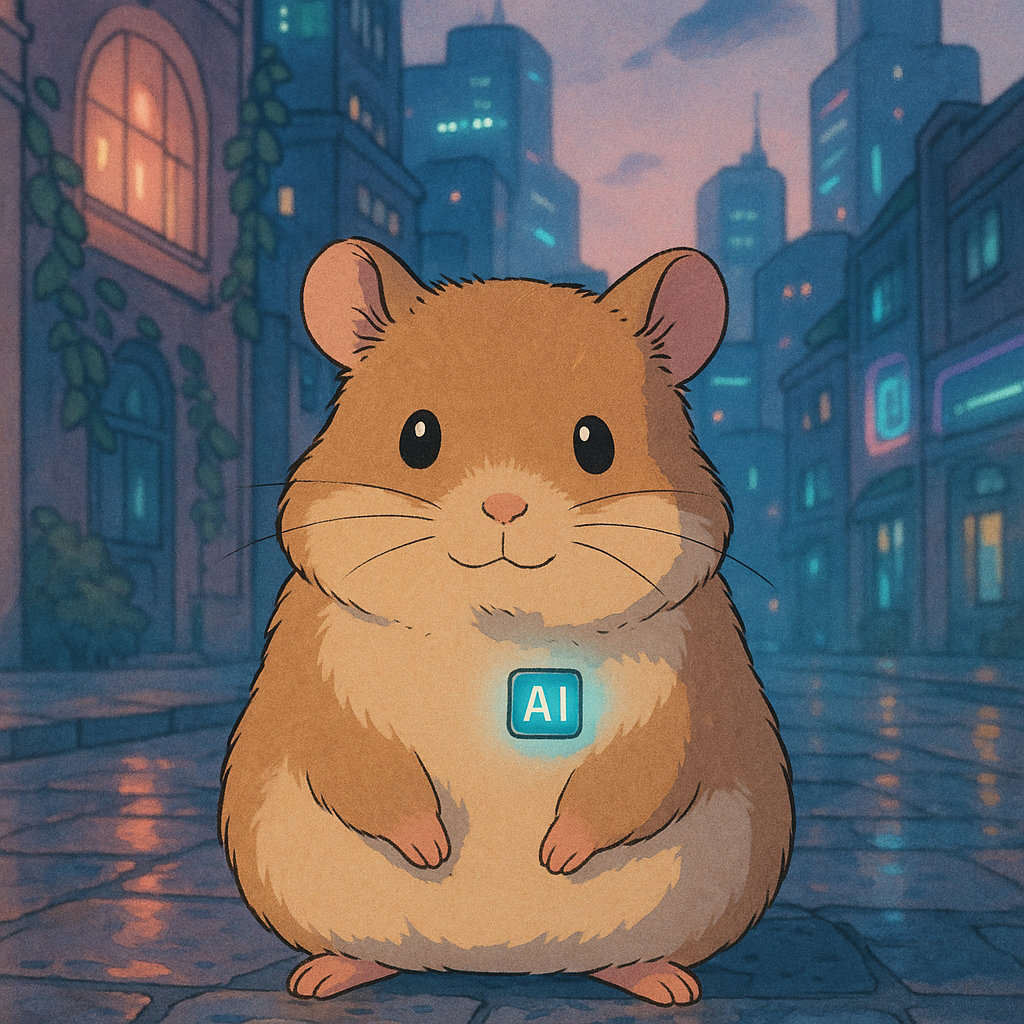

In [57]:
# 목표: 우리반 마스코트 캐릭터 만들기
prompt = """
Studio Ghibli style illustration, a cute and gentle hamster character, with soft fur and expressive eyes, wearing a tiny, subtly glowing AI chip badge, sitting peacefully on a clean, wet stone street after rain. In the background, a whimsical yet futuristic cityscape with gentle neon glow, towering but not imposing buildings with green vines, and a soft, hazy sky. Warm, ethereal lighting, pastel and muted deep blue and pink color palette, hand-drawn texture, atmospheric, charming, full of wonder :: 9:16
"""
generate_image(prompt)